# let's make machines see and know is this pictres for 

# we have some problems in model to fix them in next part

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle_api"   # folder path

In [3]:
%mkdir /content/data
%cd /content/data

/content/data


In [4]:
! kaggle datasets download -d ahmedhaytham/where-am-i

100% 4.06G/4.06G [01:54<00:00, 49.2MB/s]
100% 4.06G/4.06G [01:54<00:00, 38.2MB/s]


In [5]:
! unzip /content/data/where-am-i.zip ;

Archive:  /content/data/where-am-i.zip
  inflating: Cairo 4K - Night Drive - Driving Downtown.mp4  
  inflating: Data/Val/cairo/cairo_frame0.jpg  
  inflating: Data/Val/cairo/cairo_frame1020.jpg  
  inflating: Data/Val/cairo/cairo_frame1050.jpg  
  inflating: Data/Val/cairo/cairo_frame1080.jpg  
  inflating: Data/Val/cairo/cairo_frame1110.jpg  
  inflating: Data/Val/cairo/cairo_frame1140.jpg  
  inflating: Data/Val/cairo/cairo_frame1170.jpg  
  inflating: Data/Val/cairo/cairo_frame120.jpg  
  inflating: Data/Val/cairo/cairo_frame1200.jpg  
  inflating: Data/Val/cairo/cairo_frame1230.jpg  
  inflating: Data/Val/cairo/cairo_frame1260.jpg  
  inflating: Data/Val/cairo/cairo_frame1290.jpg  
  inflating: Data/Val/cairo/cairo_frame1320.jpg  
  inflating: Data/Val/cairo/cairo_frame1350.jpg  
  inflating: Data/Val/cairo/cairo_frame1380.jpg  
  inflating: Data/Val/cairo/cairo_frame1410.jpg  
  inflating: Data/Val/cairo/cairo_frame1440.jpg  
  inflating: Data/Val/cairo/cairo_frame1470.jpg  
  in

In [6]:
training_dir = '/content/data/Data/train'
testing_dir = '/content/data/Data/test'
validation_dir = '/content/data/Data/Val'

In [18]:
BATCH_SIZE = 64
IMAGE_SIZE = 200
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training_dir,
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    testing_dir,
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE ,
)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE ,
  
)

Found 1800 files belonging to 3 classes.
Found 600 files belonging to 3 classes.
Found 300 files belonging to 3 classes.


In [19]:
class_names = train_dataset.class_names
class_names

['cairo', 'moscow', 'paris']

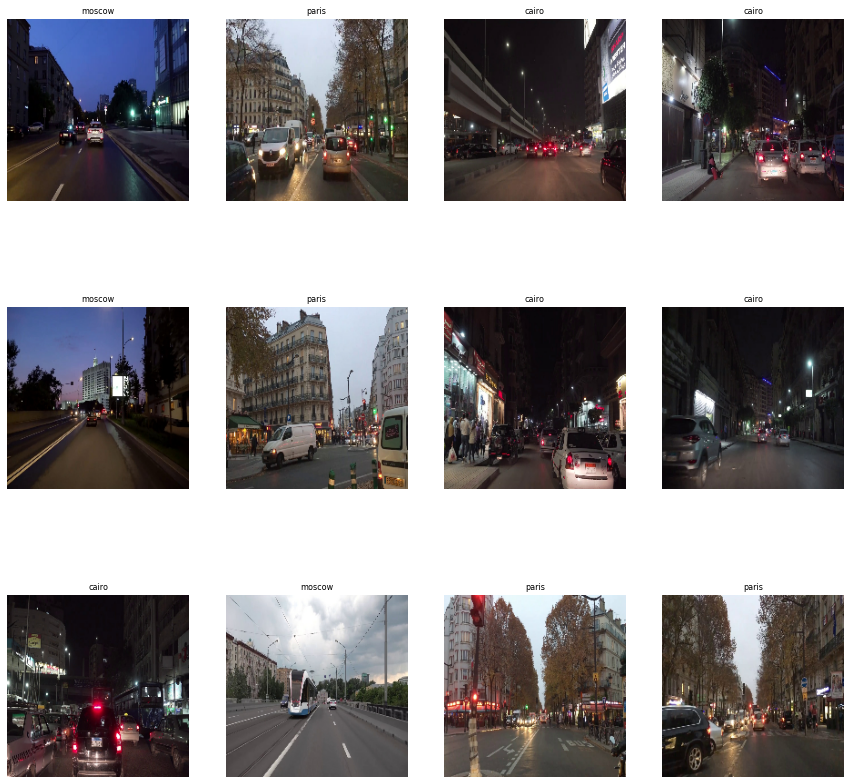

In [20]:
 plt.figure(figsize = (15,15))
 for image_batch, label_batch in train_dataset.take(1):
   for i in range(12):
     ax = plt.subplot(3,4,i+1)
     plt.imshow(image_batch[i].numpy().astype("uint8"))
     plt.title(class_names[label_batch[i]],fontsize = 8)
     plt.axis("off")
  #  print(image_batch.shape[0].shape)

In [21]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([

  layers.Conv2D(128, 9, padding='same', activation='relu',input_shape=(IMAGE_SIZE,IMAGE_SIZE,3)),
  layers.MaxPooling2D(),
  layers.Dropout(0.50),

  layers.Conv2D(64, 6, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(8, 1, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Flatten(),
  layers.Dense(200, activation='relu'),
  layers.Dropout(0.5),

  layers.Dense(128, activation='relu'),
  layers.Dropout(0.3),
  layers.Dense(64, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(16, activation='relu'),
  layers.Dense(3,activation='softmax')
])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 200, 200, 128)     31232     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 100, 100, 128)    0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 100, 100, 128)     0         
                                                                 
 conv2d_15 (Conv2D)          (None, 100, 100, 64)      294976    
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 50, 50, 64)       

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [24]:
EPOCHS = 20
history = model.fit(
    train_dataset,
    epochs = EPOCHS,
    batch_size = 16,
    validation_data = test_dataset,
) 

Epoch 1/20
29/29 [==============================] - 35s 585ms/step - loss: 5.8259 - accuracy: 0.3378 - val_loss: 1.0972 - val_accuracy: 0.3333
Epoch 2/20
29/29 [==============================] - 15s 455ms/step - loss: 1.1070 - accuracy: 0.3567 - val_loss: 1.0961 - val_accuracy: 0.3317
Epoch 3/20
29/29 [==============================] - 16s 489ms/step - loss: 1.0825 - accuracy: 0.3694 - val_loss: 1.0873 - val_accuracy: 0.3533
Epoch 4/20
29/29 [==============================] - 15s 456ms/step - loss: 1.0449 - accuracy: 0.4150 - val_loss: 1.0356 - val_accuracy: 0.7950
Epoch 5/20
29/29 [==============================] - 15s 454ms/step - loss: 0.9859 - accuracy: 0.5283 - val_loss: 0.9531 - val_accuracy: 0.6467
Epoch 6/20
29/29 [==============================] - 15s 459ms/step - loss: 0.8732 - accuracy: 0.6333 - val_loss: 0.9543 - val_accuracy: 0.7867
Epoch 7/20
29/29 [==============================] - 15s 456ms/step - loss: 0.7629 - accuracy: 0.6900 - val_loss: 0.8049 - val_accuracy: 0.8017

In [25]:
scores = model.evaluate(test_dataset)


10/10 [==============================] - 3s 128ms/step - loss: 0.4938 - accuracy: 0.8017


In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

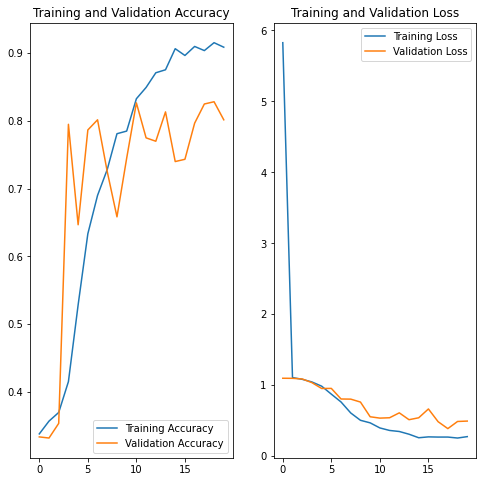

In [27]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

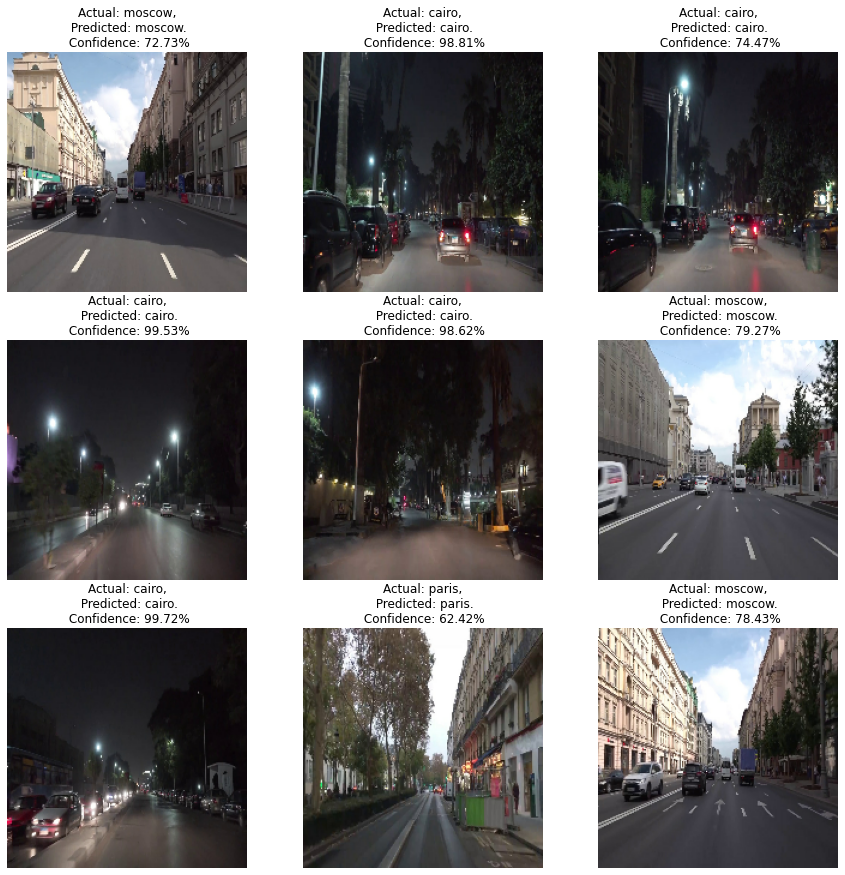

In [30]:
plt.figure(figsize=(15, 15))
for images, labels in val_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

# End of Project 
## problems will be solved don't warray